In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('kidney_disease.csv')

# Drop the 'id' column
df.drop('id', axis=1, inplace=True)

# Rename column names to make them more user-friendly
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'anemia', 'class']

# Convert necessary columns to numerical type
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

# Replace incorrect values in categorical columns
df['diabetes_mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'}, inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace='\tno', value='no')
df['class'] = df['class'].replace(to_replace={'ckd\t': 'ckd', 'notckd': 'not ckd'})
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

# Convert categorical columns to numeric using LabelEncoder
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Fill missing values
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

for col in df.columns:
    if col in cat_cols:
        impute_mode(col)
    else:
        random_value_imputation(col)


In [2]:
# Split the dataset into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Evaluate the KNN model
knn_train_accuracy = knn_model.score(X_train, y_train)
knn_test_accuracy = knn_model.score(X_test, y_test)
knn_y_pred = knn_model.predict(X_test)
knn_classification_report = classification_report(y_test, knn_y_pred)

# Save the trained KNN model to a .pkl file
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [4]:
# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_train_accuracy = rf_model.score(X_train, y_train)
rf_test_accuracy = rf_model.score(X_test, y_test)
rf_y_pred = rf_model.predict(X_test)
rf_classification_report = classification_report(y_test, rf_y_pred)

# Save the trained Random Forest model to a .pkl file
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [7]:
# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluate the SVM model
svm_train_accuracy = svm_model.score(X_train, y_train)
svm_test_accuracy = svm_model.score(X_test, y_test)
svm_y_pred = svm_model.predict(X_test)
svm_classification_report = classification_report(y_test, svm_y_pred)

# Save the trained SVM model to a .pkl file
joblib.dump(svm_model, 'svm_model.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['svm_model.pkl']

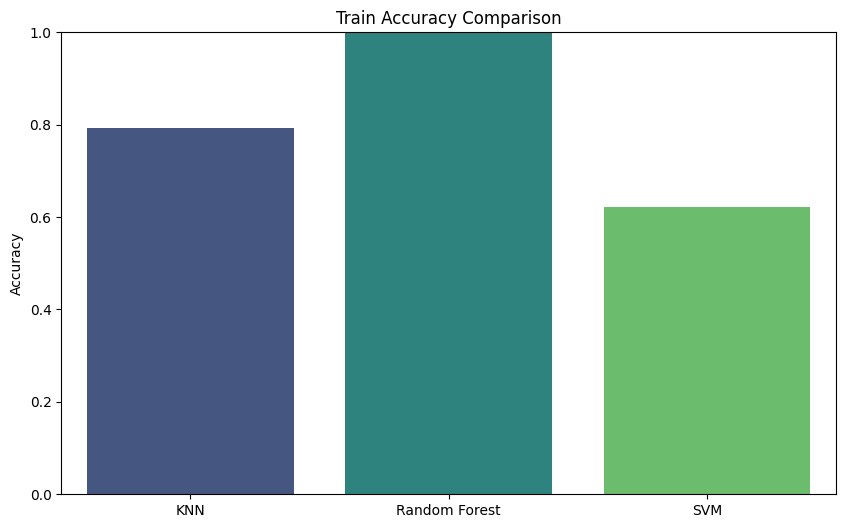

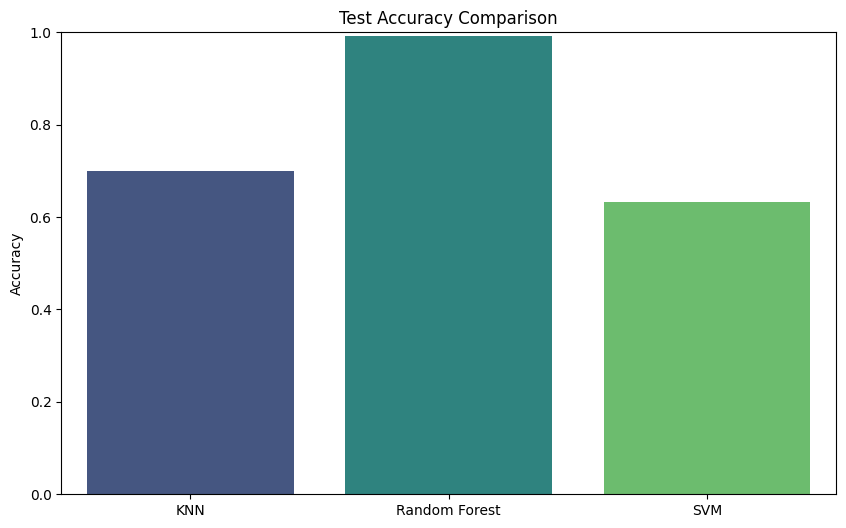

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        76
           1       0.58      0.66      0.62        44

    accuracy                           0.70       120
   macro avg       0.68      0.69      0.69       120
weighted avg       0.71      0.70      0.70       120


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.98      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        76
           1       0.00      0.00      0.00        44

    accuracy                           0.63       120
   macro avg       0.32

In [8]:
# Compare the performance of the models using various evaluation metrics
models = ['KNN', 'Random Forest', 'SVM']
train_accuracies = [knn_train_accuracy, rf_train_accuracy, svm_train_accuracy]
test_accuracies = [knn_test_accuracy, rf_test_accuracy, svm_test_accuracy]
classification_reports = [knn_classification_report, rf_classification_report, svm_classification_report]

# Plot the accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=train_accuracies, palette='viridis')
plt.title('Train Accuracy Comparison')
plt.ylim(0, 1.0)
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=test_accuracies, palette='viridis')
plt.title('Test Accuracy Comparison')
plt.ylim(0, 1.0)
plt.ylabel('Accuracy')
plt.show()

# Display the classification reports
for model, report in zip(models, classification_reports):
    print(f"Classification Report for {model}:\n{report}\n")